$$U_i^{n+1} = U_i^n + \frac{\Delta t}{\Delta x^2} \left[ U_{i+1}^n - 2U_i^n + U_{i-1}^n \right]$$

Text(0.5, 1.0, 'Numerical Solution to the Heat Equation')

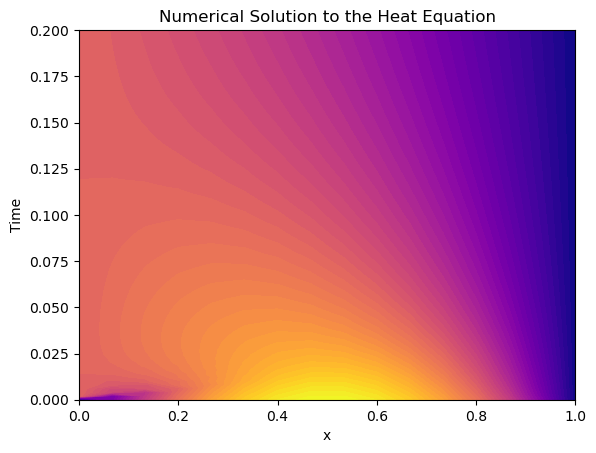

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

class MeshClass:
    def __init__(self,a,b,T,BC_a,BC_b,t_res,x_res):
        self.a = a
        self.b = b
        self.T = T
        self.BC_a = BC_a
        self.BC_b = BC_b
        self.t_res = t_res
        self.x_res = x_res

        self.Dx = float(b - a) / (x_res - 1)
        self.Dt = float(T) / (t_res - 1)

        self.mesh_arr = np.zeros((t_res,x_res))

    def print(self):
        for t in reversed(range(self.t_res)):
            for x in range(self.x_res):
                print(f"{self.mesh_arr[t][x]:.2f} ", end="")
            print("")
    
    def init_cond(self, x):
        return (self.a - x)*(x - self.b)

    def index_to_xval(self, i):
        return self.a + self.Dx*i

    def initialize(self):
        for i in range(x_res):
            x = self.index_to_xval(i)
            self.mesh_arr[0][i] = self.init_cond(x)

    def solve_index(self, t, x):
        U_left = self.mesh_arr[t-1][x-1]
        U_down = self.mesh_arr[t-1][x]
        U_right = self.mesh_arr[t-1][x+1]

        DU = (self.Dt / (self.Dx**2)) * (U_left - 2*U_down + U_right)

        self.mesh_arr[t][x] = U_down + DU
    
    def solve_ivp_dirichlet(self):
        for t in range(1,t_res):
            self.mesh_arr[t][0] = BC_a
            self.mesh_arr[t][x_res-1] = BC_b

            for x in range(1,x_res - 1):
                self.solve_index(t, x)

a = 0.0
b = 1.0
T = 0.2
BC_a = 0.15
BC_b = 0.0
t_res = 100
x_res = 16

mesh = MeshClass(a, b, T, BC_a, BC_b, t_res, x_res)

mesh.initialize()

mesh.solve_ivp_dirichlet()

x_arr = np.linspace(a, b, x_res)
t_arr = np.linspace(0, T, t_res)

plt.figure()

[X,Y] = np.meshgrid(x_arr, t_arr)
plt.contourf(X, Y, mesh.mesh_arr, 50, cmap="plasma")
plt.xlabel("x")
plt.ylabel("Time")
plt.title("Numerical Solution to the Heat Equation")